回归分析（regression analysis）指的是确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法。回归分析按照涉及的变量的多少，分为一元回归和多元回归分析；按照因变量的多少，可分为简单回归分析和多重回归分析；按照自变量和因变量之间的关系类型，可分为线性回归分析和非线性回归分析。
在大数据分析中，回归分析是一种预测性的建模技术，它研究的是因变量（目标）和自变量（预测器）之间的关系。这种技术通常用于预测分析，时间序列模型以及发现变量之间的因果关系。例如，司机的鲁莽驾驶与道路交通事故数量之间的关系，最好的研究方法就是回归。
回归分析的主要应用场景是进行预测和控制，例如计划制定、KPI制定、目标制定等方面；也可以基于预测的数据与实际数据进行比对和分析，确定事件发展程度并给未来行动提供方向性指导。
常用的回归算法包括线性回归、二项式回归、对数回归、指数回归、核SVM、岭回归、Lasso等。

回归方程一般为y=ax+b的形式，其中a为变量x的回归系数，相关系数为R，判定系数为即R<sup>2</sup>
+ 回归系数：其绝对值大小能说明自变量与因变量之间的变化比例
+ 判定系数：自变量对因变量的方差解释，为回归平方和与总离差平方和之比值
+ 相关系数：也称解释系数，衡量变量间的相关程度，其本质是线性相关性的判断

ps：
+ 如果有多个自变量的话R<sup>2</sup>代表的这两个自变量共同影响的结果。假如在线性回归中只有一个自变量，那么判定系数等于相关系数的平方。
+ 回归系数和相关系数大于0，正相关；小于0，负相关。


使用回归模型应该注意自变量的变化，如果新增了自变量，或者训练模型时遗漏了重要变量，这样会导致模型参数有偏差，预测不准确；如果自变量的范围超出了之前训练时的范围，那么原来的模型也不适用。

判定系数经常作为拟合好坏的主要参照指标，当一个新的指标加入模型后发现模型不变，此时无法根据判定系数来反推该指标的重要性程度，例如该指标无效（或有效）。

回归分析算法的选择：
+ 最普通的，最基础的，基于为最小二乘法的普通线性回归最合适；适合规律明显，数据结构简单的数据。
+ 如果数据变量少可以通过散点图发现自变量和因变量之间规律，然后确定使用何种回归方法
+ 自变量之间存在较强的共线性，使用对多重共线性处理的算法，如岭回归算法。
+ 如果数据集噪音较多，使用主成分回归
+ 高纬度变量下，使用正则化回归方法效果较好，例如Lasso,Ridge和ElasticNet,或者使用逐步回归从中挑选出影响显著的自变量来建立回归模型。
+ 同时验证多个算法，并想从中选择一个来做做好的你和，使用交叉验证做多个模型效果对比，并通过R-square、Adjusted R-square、AIC、BIC以及各种残差、误差项指标做综合评估。
+ 注重模型的解释性，线性回归、指数回归、对数回归、二项或多项式回归要优于核回归、支持向量回归机等
+ 集成方法，可以使用集成算法对确认的算法做组合使用。

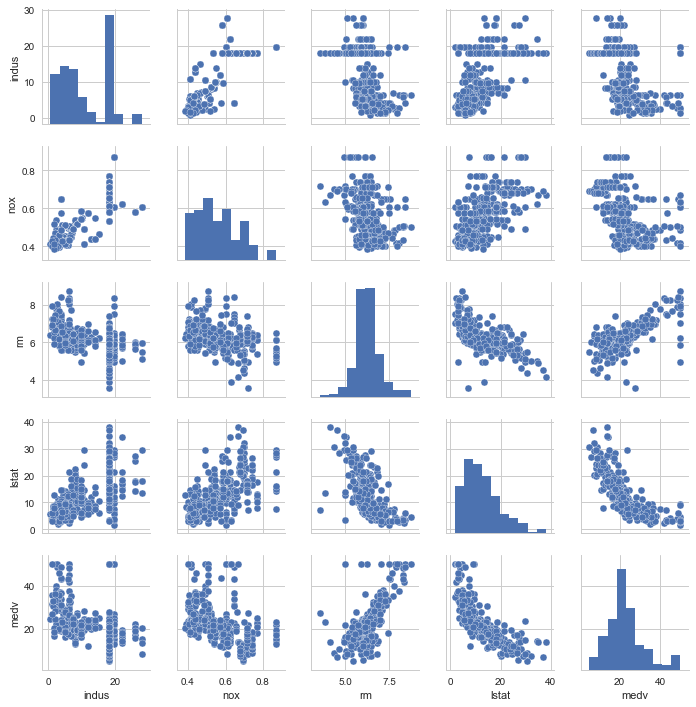

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor   # 集成算法
from sklearn.model_selection import cross_val_score    # 交叉验证
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 数据导入
df = pd.read_csv('https://raw.githubusercontent.com/ffzs/dataset/master/boston/train.csv', 
                 usecols=['lstat', 'indus', 'nox', 'rm', 'medv'])

# 可视化数据关系
sns.set(style='whitegrid', context='notebook')   #style控制默认样式,context控制着默认的画幅大小
sns.pairplot(df, size=2)
plt.savefig('x.png')

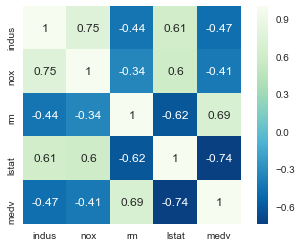

In [45]:
# 相关度
corr = df.corr()
# 相关度热力图
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)
plt.savefig('xx.png')

可见自变量lstat与因变量medv强负相关，自变量rm与因变量medv强正相关

In [ ]:
# 自变量
X = df[['lstat', 'rm']].values
# 因变量
y = df[df.columns[-1]].values

# 设置交叉验证次数
n_folds = 5

# 建立贝叶斯岭回归模型
br_model = BayesianRidge()

# 普通线性回归
lr_model = LinearRegression()

# 弹性网络回归模型
etc_model = ElasticNet()

# 支持向量机回归
svr_model = SVR()

# 梯度增强回归模型对象
gbr_model = GradientBoostingRegressor()

# 不同模型的名称列表
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
# 不同回归模型
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
# 交叉验证结果
cv_score_list = []
# 各个回归模型预测的y值列表
pre_y_list = []

# 读出每个回归模型对象
for model in model_dic:
    # 将每个回归模型导入交叉检验
    scores = cross_val_score(model, X, y, cv=n_folds)
    # 将交叉检验结果存入结果列表
    cv_score_list.append(scores)
    # 将回归训练中得到的预测y存入列表
    pre_y_list.append(model.fit(X, y).predict(X))
### 模型效果指标评估 ###
# 获取样本量，特征数
n_sample, n_feature = X.shape
# 回归评估指标对象列表
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
# 回归评估指标列表
model_metrics_list = []
# 循环每个模型的预测结果
for pre_y in pre_y_list:
    # 临时结果列表
    tmp_list = []
    # 循环每个指标对象
    for mdl in model_metrics_name:
        # 计算每个回归指标结果
        tmp_score = mdl(y, pre_y)
        # 将结果存入临时列表
        tmp_list.append(tmp_score)
    # 将结果存入回归评估列表
    model_metrics_list.append(tmp_list)
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])

In [35]:
df_score

,0,1,2,3,4
BayesianRidge,0.592065,0.647306,0.264127,0.149150,-0.648918
LinearRegression,0.601070,0.651541,0.308329,0.142842,-0.672901
ElasticNet,0.382249,0.552730,0.003601,0.421609,-0.077382
SVR,0.756072,0.536749,-0.659198,0.329436,-0.420482
GBR,0.373025,0.815649,0.568901,0.513021,0.058829


In [38]:
df_met

,ev,mae,mse,r2
BayesianRidge,0.634281,3.895337,30.683785,0.634281
LinearRegression,0.634334,3.888380,30.679309,0.634334
ElasticNet,0.586648,4.213199,34.680158,0.586648
SVR,0.615478,3.575339,32.894948,0.607926
GBR,0.934846,1.716812,5.466391,0.934846


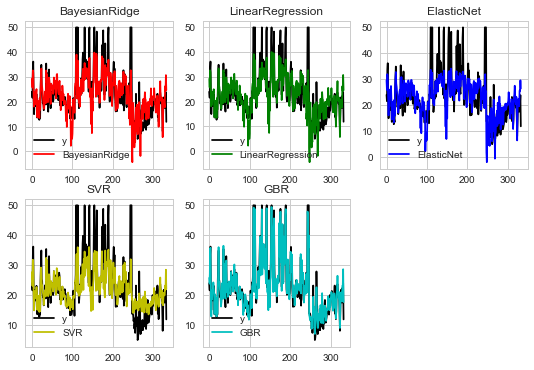

In [46]:
### 可视化 ###
# 创建画布
plt.figure(figsize=(9, 6))
# 颜色列表
color_list = ['r', 'g', 'b', 'y', 'c']
# 循环结果画图
for i, pre_y in enumerate(pre_y_list):
    # 子网络
    plt.subplot(2, 3, i+1)
    # 画出原始值的曲线
    plt.plot(np.arange(X.shape[0]), y, color='k', label='y')
    # 画出各个模型的预测线
    plt.plot(np.arange(X.shape[0]), pre_y, color_list[i], label=model_names[i])
    plt.title(model_names[i])
    plt.legend(loc='lower left')
plt.savefig('xxx.png')
plt.show()

可见梯度增强回归（GBR）是所有模型中拟合效果最好的

评估指标解释：
+ explained_variance_score：解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。
+ mean_absolute_error：平均绝对误差（Mean Absolute Error, MAE），用于评估预测结果和真实数据集的接近程度的程度，其值越小说明拟合效果越好。
+ mean_squared_error：均方差（Mean squared error, MSE），该指标计算的是拟合数据和原始数据对应样本点的误差的平方和的均值，其值越小说明拟合效果越好。
+ r2_score：判定系数，其含义是也是解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。